In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

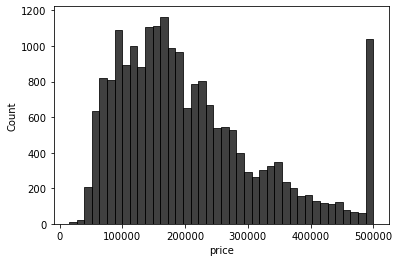

In [25]:
sns.histplot(df.median_house_value, bins=40, color='black')
plt.xlabel('price')
plt.ylabel = ('count')

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [28]:
del df['ocean_proximity']

In [32]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [37]:
len(df)

20640

In [38]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [40]:
idx = np.arange(n)
np.random.shuffle(idx)

In [42]:
df_shuffled = df.iloc[idx]

In [43]:
df_train = df_shuffled[:n_train].copy()
df_val = df_shuffled[n_train:n_train+n_val].copy()
df_test = df_shuffled[n_train+n_val:].copy()

In [50]:
y_train_orig = df_train['median_house_value'].values
y_val_orig = df_val['median_house_value'].values
y_test_orig = df_test['median_house_value'].values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [51]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [71]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [72]:
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [104]:
def prepare_X(df):
    option = 0       
    df_num = df[base]
    df_num = df_num.fillna(option)
    X = df_num.values
    return X

In [105]:
X_val = prepare_X(df_val)
w_0, w = train_linear_regression(X_val, y_val)

In [106]:
y_pred = w_0 + X_val.dot(w)

In [107]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [108]:
round(rmse(y_val, y_pred), 2)

0.34

In [ ]:
# QUESTRION 3 
# 1. fillna with 0: RMSE = 0.34
# 2. fillna with mean: RMSE = 0.34

In [109]:
# QUESTION 4
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [110]:
X_train = prepare_X(df_train)

In [113]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),2))

     0 0.34
 1e-06 0.34
0.0001 0.34
 0.001 0.34
  0.01 0.34
   0.1 0.34
     1 0.34
     5 0.35
    10 0.35


In [153]:
# QUESTION 5
rmse_score = []
for v in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(v)
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled[:n_train].copy()
    df_val = df_shuffled[n_train:n_train+n_val].copy()
    df_test = df_shuffled[n_train+n_val:].copy()
    
    y_train_orig = df_train['median_house_value'].values
    y_val_orig = df_val['median_house_value'].values
    y_test_orig = df_test['median_house_value'].values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
  
    
    X_val = prepare_X(df_val)
    w_0, w = train_linear_regression(X_val, y_val)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_pred, y_val)
    
    rmse_score.append(rmse_val)


In [154]:
rmse_score

[0.3383899450959167,
 0.33568021374000073,
 0.3308095701950043,
 0.3395798152144959,
 0.3355614943840107,
 0.3420634263418839,
 0.3430789434116625,
 0.3386941084907638,
 0.3449388159212408,
 0.334660401867554]

In [155]:
round(np.std(rmse_score), 3)

0.004

In [164]:
# QUESTION 6
np.random.seed(9)
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

df_train = df_shuffled[:n_train].copy()
df_val = df_shuffled[n_train:n_train+n_val].copy()
df_test = df_shuffled[n_train+n_val:].copy()

y_train_orig = df_train['median_house_value'].values
y_val_orig = df_val['median_house_value'].values
y_test_orig = df_test['median_house_value'].values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_combine = pd.concat([df_train, df_val])
y_combine = pd.concat([y_train_orig, y_val_orig])

X_combine = prepare_X(df_combine)
w_0, w = train_linear_regression_reg(X_combine, y_combine, r=0.001)
y_pred = w_0 + X_combine.dot(w)
rmse(y_pred, y_val)